# Descriptive analysis of the full occurrences dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset**

In [2]:
occurences = pd.read_csv('../raw_data/gbif/occurences.csv')

In [3]:
occurences.head(3)

,gbifID,latitude,longitude,scientificName
0,3746955493,52.490407,13.321256,Oxalis corniculata L.
1,1913684610,49.308560,11.357783,Erigeron annuus (L.) Pers.
2,2238782236,52.506927,13.267875,Asplenium ruta-muraria L.


#### Appending extra column with coordinates

In [4]:
occurences['coordinates'] = occurences.apply(lambda row: (row.latitude, row.longitude), axis = 1)
occurences.head()

,gbifID,latitude,longitude,scientificName,coordinates
0,3746955493,52.490407,13.321256,Oxalis corniculata L.,"(52.490407, 13.321256)"
1,1913684610,49.308560,11.357783,Erigeron annuus (L.) Pers.,"(49.30856, 11.357783)"
2,2238782236,52.506927,13.267875,Asplenium ruta-muraria L.,"(52.506927, 13.267875)"
3,2603378229,52.484527,13.240579,Luzula campestris (L.) DC.,"(52.484527, 13.240579)"
4,3335417331,50.590880,8.686314,Salvia pratensis L.,"(50.59088, 8.686314)"


### Number of unique observations, locations and species

In [5]:
num_obs = len(occurences)
f'Number of observations = {num_obs}'

'Number of observations = 2078708'

In [6]:
num_locations = occurences['coordinates'].nunique()
f'Number of unique locations = {num_locations} ({round(100*(num_locations/num_obs),1)}%)'

'Number of unique locations = 1362718 (65.6%)'

In [7]:
num_species = occurences['scientificName'].nunique()
f'Number of different species = {num_species}'

'Number of different species = 8824'

### Distribution of observations per species

In [8]:
counts = occurences.groupby(['scientificName']).count()[['gbifID']].rename(columns = {'gbifID': 'num_obs'}).reset_index()

In [9]:
counts.head(5)

,scientificName,num_obs
0,Abelia ×grandiflora (Rovelli ex André) Rehder,1
1,Abeliophyllum distichum Nakai,1
2,Abies Mill.,40
3,Abies alba Mill.,719
4,Abies amabilis Douglas ex J.Forbes,8


/root/.pyenv/versions/3.8.12/envs/biodiversipy/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_obs'>

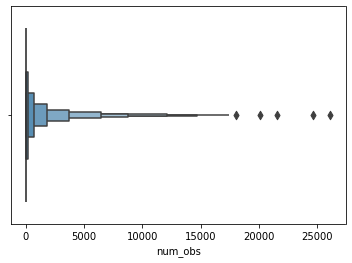

In [10]:
sns.boxenplot(counts['num_obs'])

In [11]:
f"Number of species with 1 observation = {len(counts[counts['num_obs'] == 1])} ({round(100*len(counts[counts['num_obs'] == 1])/num_species, 1)}%)"

'Number of species with 1 observation = 2491 (28.2%)'

In [12]:
f"Number of species with 5 observations or less = {len(counts[counts['num_obs'] < 6])} ({round(100*len(counts[counts['num_obs'] < 6])/num_species, 1)}%)"

'Number of species with 5 observations or less = 4597 (52.1%)'

In [13]:
f"Number of species with 1000 observations or more = {len(counts[counts['num_obs'] >= 1000])} ({round(100*len(counts[counts['num_obs'] >= 1000])/num_species, 1)}%)"

'Number of species with 1000 observations or more = 440 (5.0%)'

In [14]:
f"Number of species with 10000 observations or more = {len(counts[counts['num_obs'] >= 10000])} ({round(100*len(counts[counts['num_obs'] >= 10000])/num_species, 1)}%)"

'Number of species with 10000 observations or more = 25 (0.3%)'

In [15]:
counts.sort_values(by = 'num_obs', ascending = False).head(5)

,scientificName,num_obs
277,Alliaria petiolata (M.Bieb.) Cavara & Grande,26140
85,Achillea millefolium L.,24644
3188,Fagus sylvatica L.,21579
1767,Chelidonium majus L.,20066
3593,Glechoma hederacea L.,18008


### Number of species per unique location

In [16]:
locations = occurences.groupby('coordinates').count()[['scientificName']].rename(columns = {'scientificName': 'num_species'})

In [17]:
locations.sort_values(by='num_species', ascending = False).head(10)

,num_species
coordinates,
"(50.126633, 8.657827)",981
"(51.616657, 7.950153)",886
"(52.453918, 13.404007)",625
"(52.43409, 13.417997)",609
"(48.732418, 10.133429)",590
"(48.238609, 10.152223)",547
"(52.006245, 7.725226)",537
"(49.069298, 10.319209)",535
"(48.873989, 10.290451)",495


/root/.pyenv/versions/3.8.12/envs/biodiversipy/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_species'>

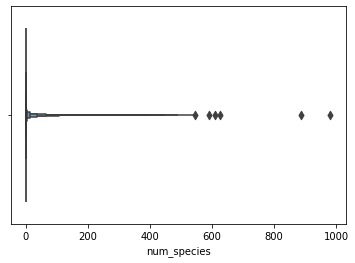

In [18]:
sns.boxenplot(locations['num_species'])

In [19]:
f"Number of locations with more than 30 species observed = {int(locations[locations['num_species']> 30].count())}"

'Number of locations with more than 30 species observed = 6204'

In [20]:
f"Number of observations corresponding to locations with more than 30 species observed= {int(locations[locations['num_species']> 30].sum())}"

'Number of observations corresponding to locations with more than 30 species observed= 513216'

##  Plotting the observations

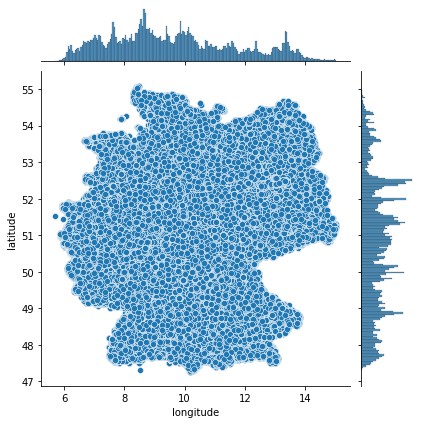

In [21]:
sns.jointplot(data = occurences, x = 'longitude', y = 'latitude')